# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG      H   MIT    GAME
0   0   7   3   6   5933   1068  6199  DEFEAT
    1   7   0  10   3601    747     0  DEFEAT
    2   9   1   6   4352      0     0  DEFEAT
    3   7   7   2   2332   6325     0  DEFEAT
    4   6   4   2   3410   5979   606  DEFEAT
...    ..  ..  ..    ...    ...   ...     ...
453 5  18   7  12   8122      0  7417  DEFEAT
    6  28   0  14  10590      0  2985  DEFEAT
    7  21   1  12   8113    756    56  DEFEAT
    8   8  17   9   2548  10580  1212  DEFEAT
    9  13  15  14   5175   8684   511  DEFEAT

[4540 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4540 entries, (0, 0) to (453, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       4540 non-null   int64 
 1   A       4540 non-null   int64 
 2   D       4540 non-null   int64 
 3   DMG     4540 non-null   int64 
 4   H       4540 non-null   int64 
 5   MIT     4540 non-null   int64 
 6   GAME    4540 non-null   object
dtypes: int64(6), object(1)
memory usage: 281.7+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000,4540.000000
mean,13.690529,7.219604,6.403524,6183.030837,3824.042511,2376.745154
std,9.610504,8.181975,3.878092,4323.759153,5065.306762,4636.667843
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,4.000000,2722.500000,0.000000,0.000000
50%,12.000000,4.000000,6.000000,5449.500000,712.500000,341.500000
75%,20.000000,11.250000,9.000000,9088.500000,7415.750000,1943.250000
max,58.000000,54.000000,21.000000,26666.000000,27756.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
tank = scoreboards[::players]
damage = pd.concat([scoreboards[1::players], scoreboards[2::players]])
support = pd.concat([scoreboards[3::players], scoreboards[4::players]])

그림 저장:tank_hist


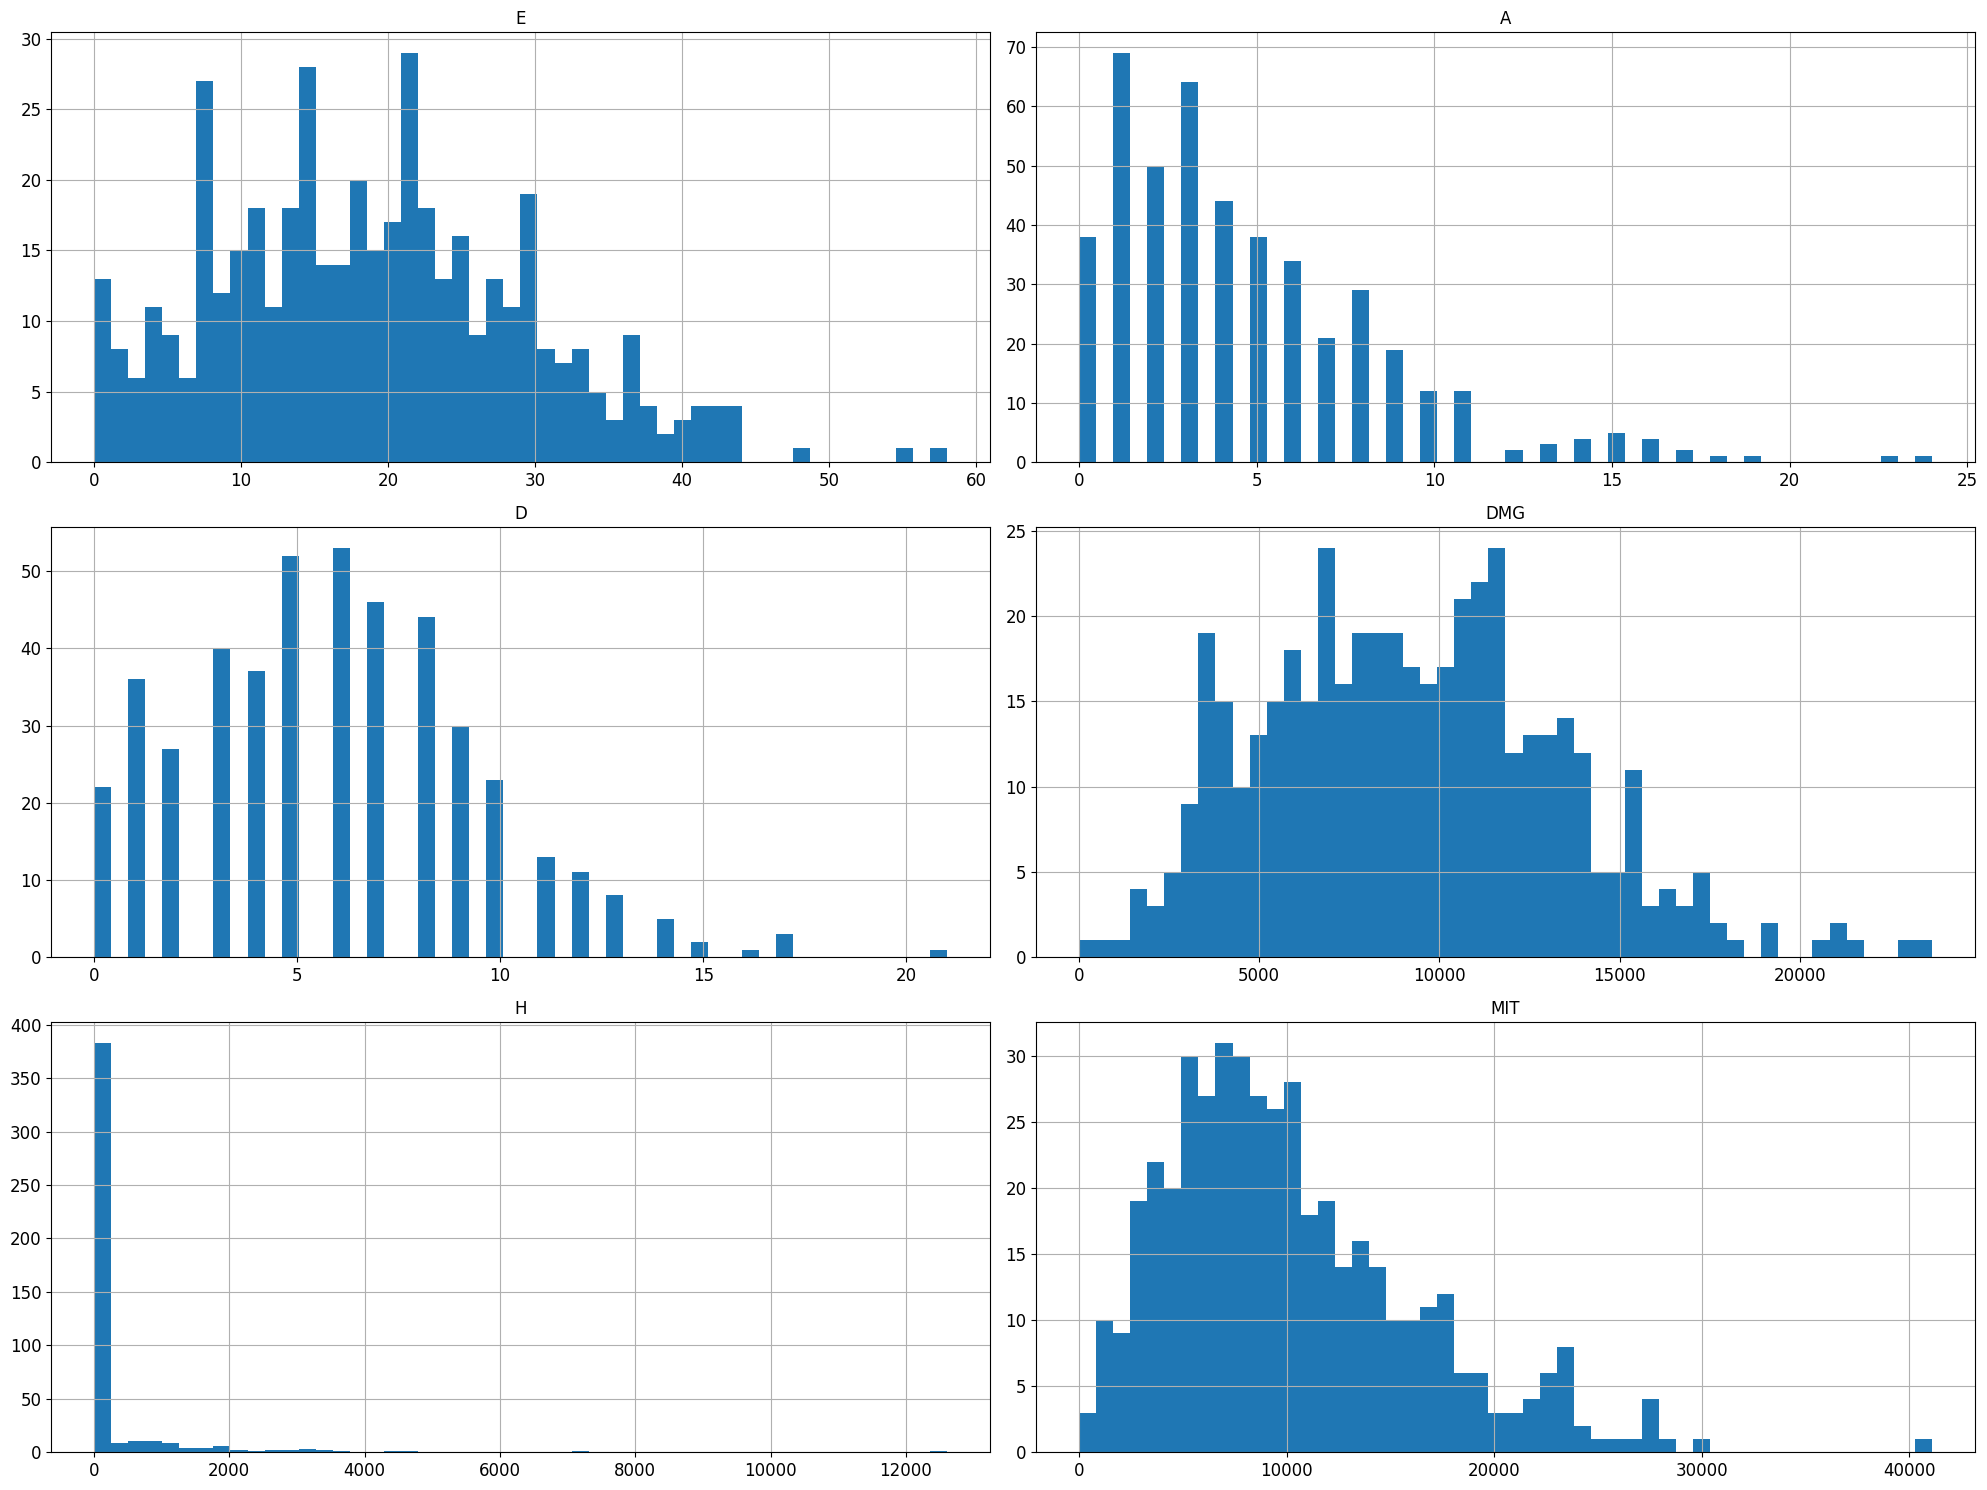

In [6]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


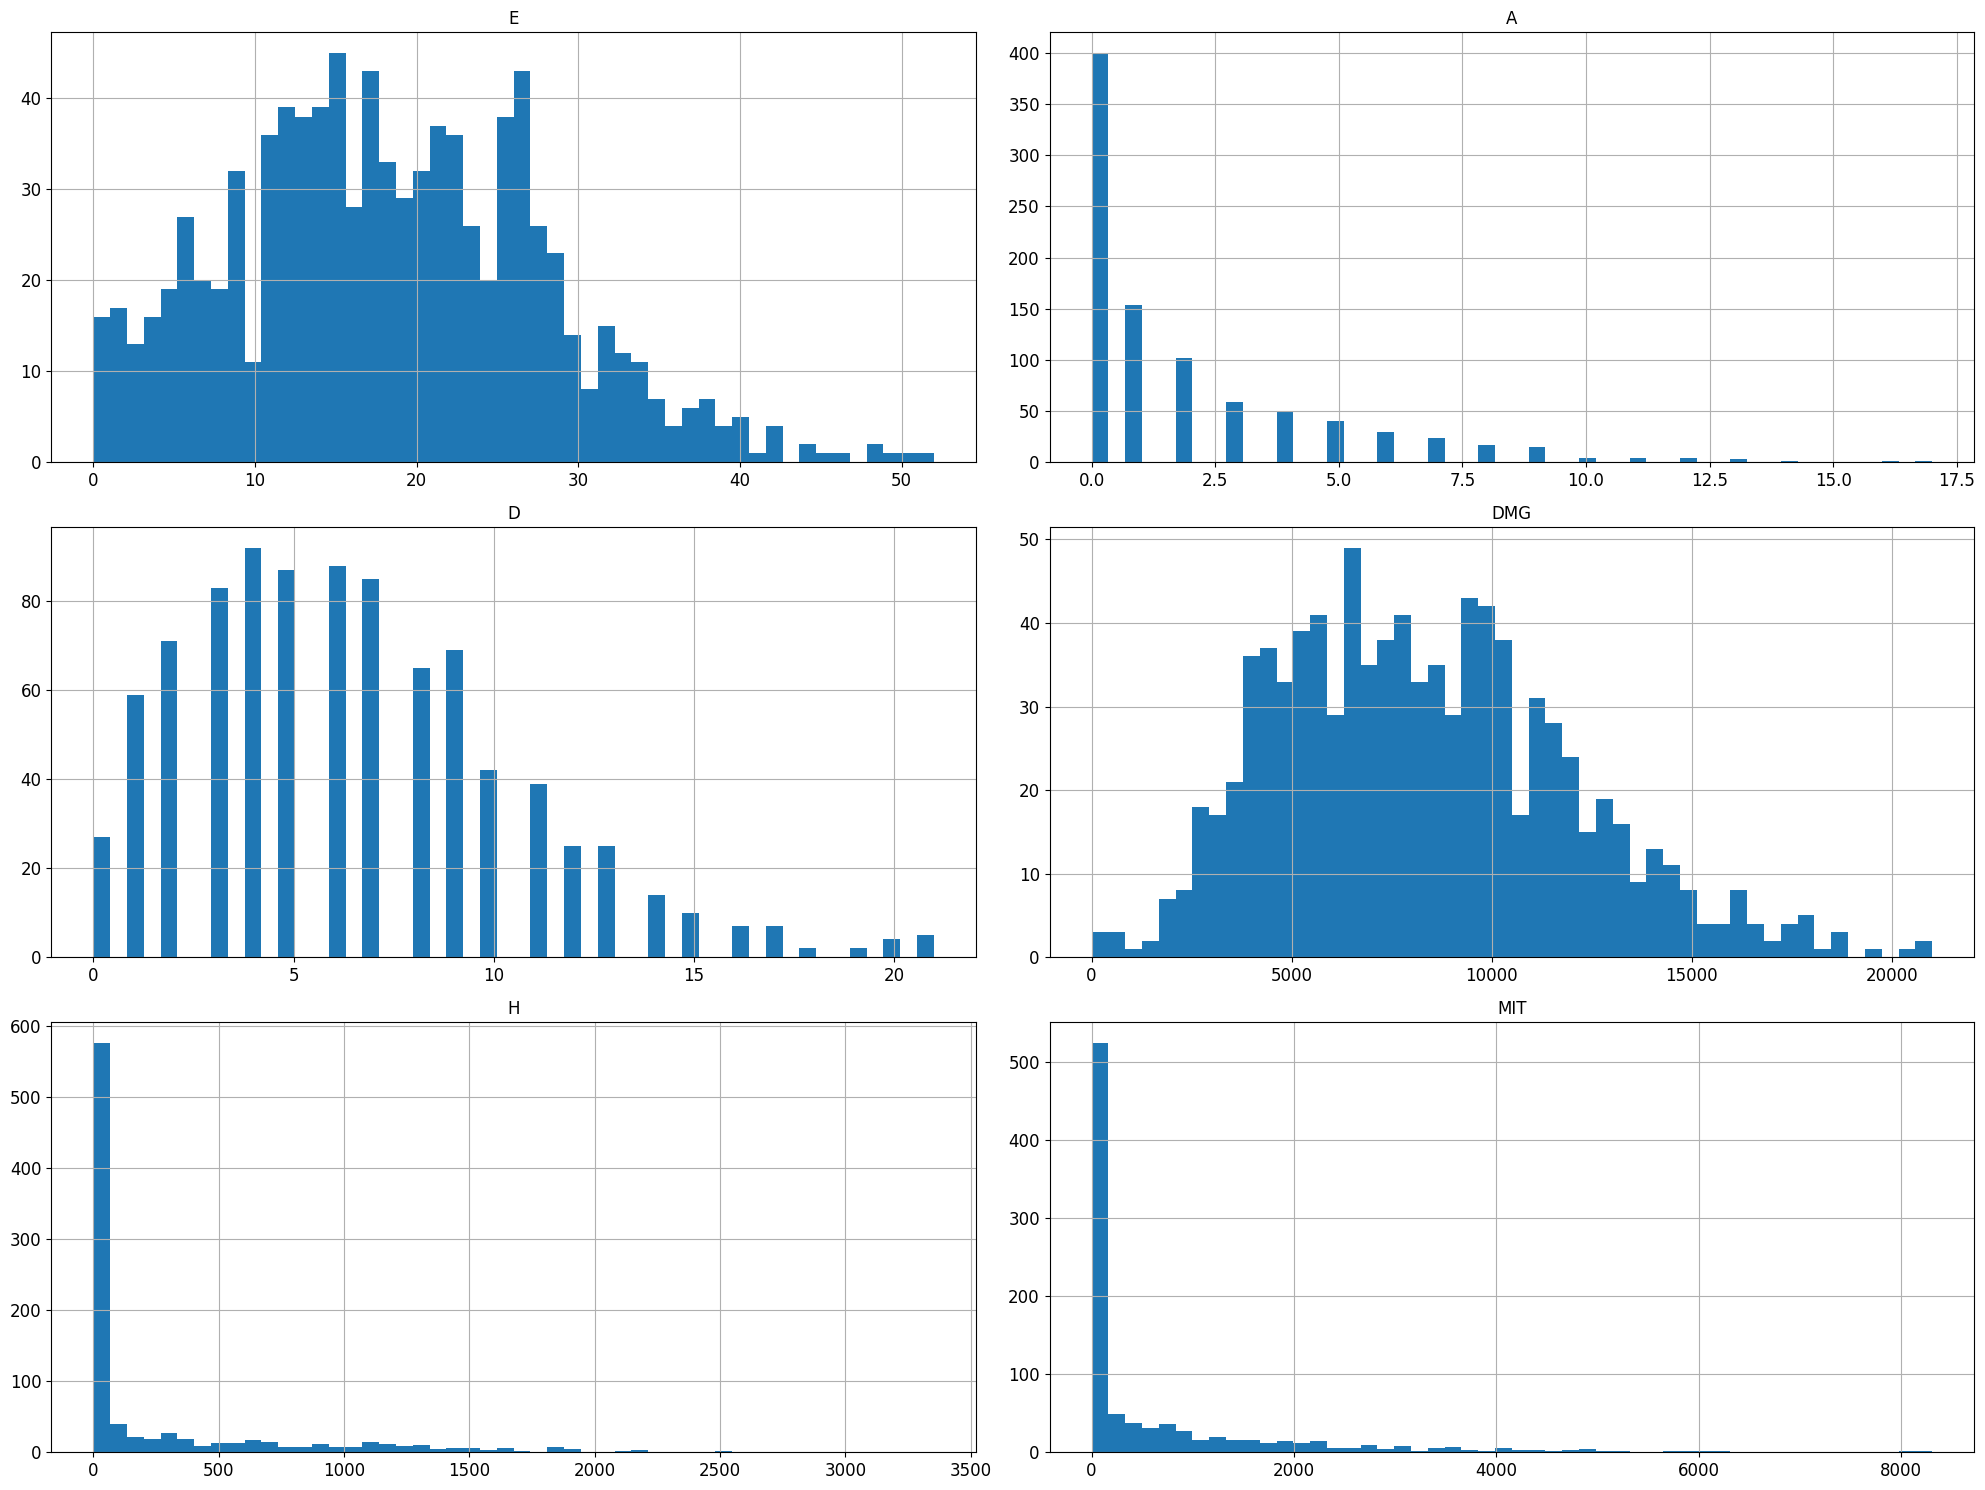

In [7]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


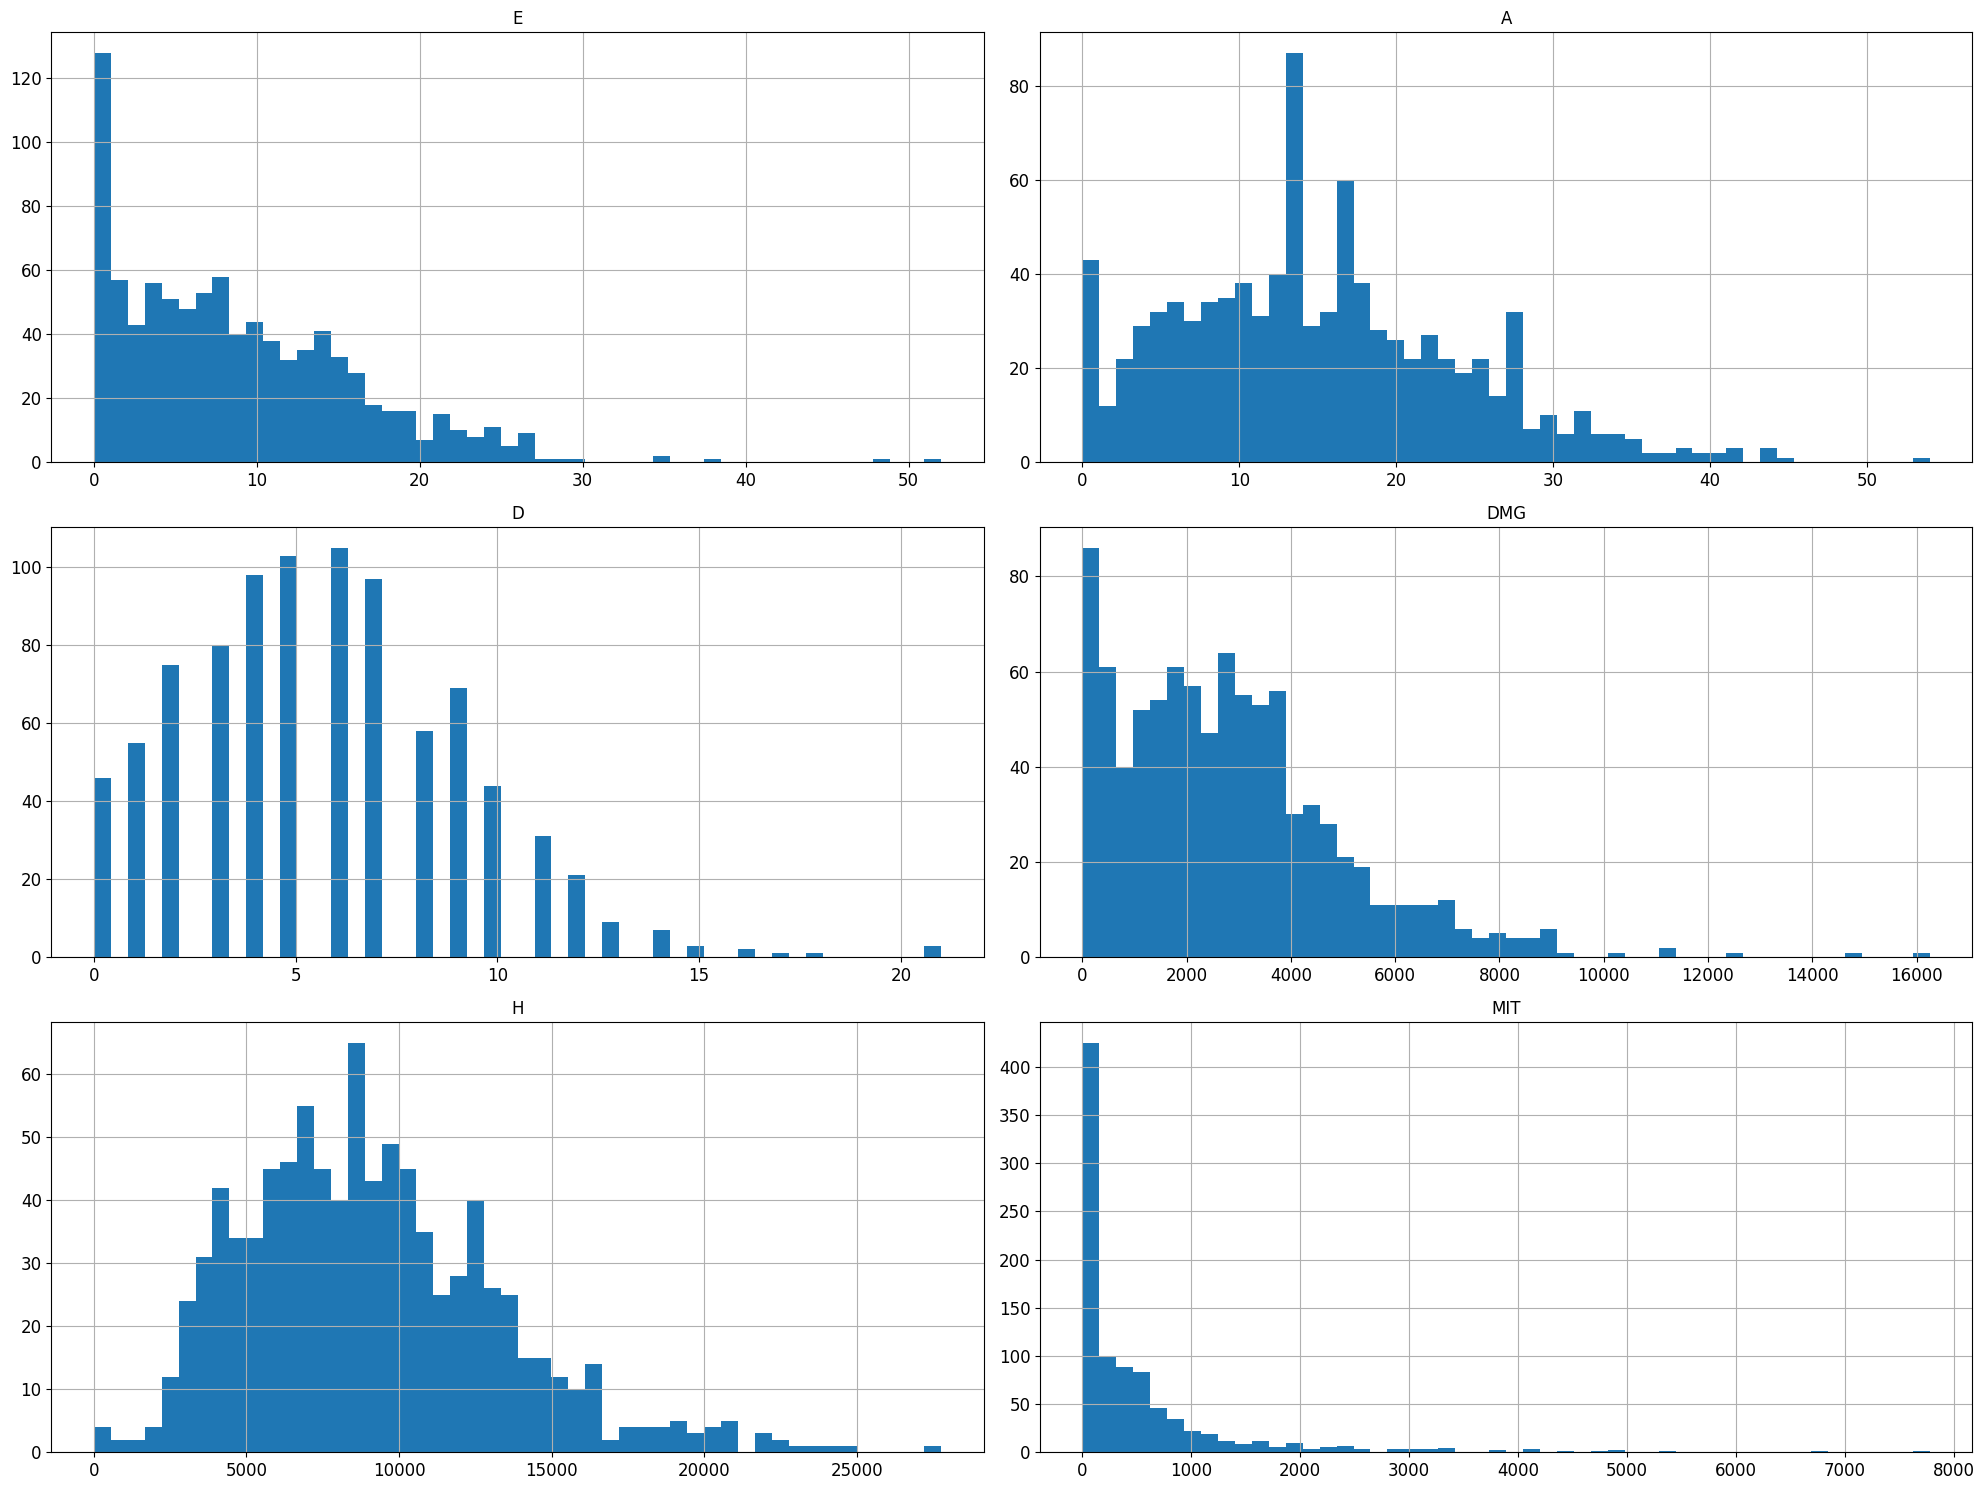

In [8]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [9]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG     H    MIT     GAME
453 0  36   3   6  11425     0  18862  VICTORY
    1  33   4   9  11017  3057      0  VICTORY
    2  36   0   5   9860     0   1417  VICTORY
    3  21  23  11   4096  7658    405  VICTORY
    4  17  32   8   4631  8997   3093  VICTORY
...    ..  ..  ..    ...   ...    ...      ...
323 5   2   0   6   2352     0   5257   DEFEAT
    6   2   0   5   3332   202      0   DEFEAT
    7   3   0   9   1700   110      0   DEFEAT
    8   1   1   7    307  2354      0   DEFEAT
    9   0   0   1      0   417      0   DEFEAT

[4540 rows x 7 columns]

In [10]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [11]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
453 0  0.620690  0.055556  0.285714  0.428448  0.000000  0.450716
    1  0.568966  0.074074  0.428571  0.413148  0.110138  0.000000
    2  0.620690  0.000000  0.238095  0.369759  0.000000  0.033860
    3  0.362069  0.425926  0.523810  0.153604  0.275904  0.009678
    4  0.293103  0.592593  0.380952  0.173667  0.324146  0.073909
...         ...       ...       ...       ...       ...       ...
323 5  0.034483  0.000000  0.285714  0.088202  0.000000  0.125618
    6  0.034483  0.000000  0.238095  0.124953  0.007278  0.000000
    7  0.051724  0.000000  0.428571  0.063752  0.003963  0.000000
    8  0.017241  0.018519  0.333333  0.011513  0.084810  0.000000
    9  0.000000  0.000000  0.047619  0.000000  0.015024  0.000000

[4540 rows x 6 columns]

In [12]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(454, 60)
(454,)


In [13]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.92307692, 0.91208791, 0.86813187, 0.91208791, 0.92222222])

In [14]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.63736264, 0.56043956, 0.57142857, 0.52747253, 0.54444444])

In [15]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.89010989, 0.89010989, 0.86813187, 0.84615385, 0.88888889])

In [16]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

[(LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9075213675213675),
 (RidgeClassifierCV(), 0.9075213675213675),
 (LogisticRegression(n_jobs=-1), 0.9031257631257631),
 (RidgeClassifier(), 0.9031257631257631),
 (SVC(), 0.903101343101343),
 (LinearSVC(dual='auto'), 0.9009279609279609),
 (NearestCentroid(), 0.8987301587301587),
 (NuSVC(), 0.8987301587301587),
 (ExtraTreesClassifier(n_jobs=-1), 0.8965567765567766),
 (RandomForestClassifier(n_jobs=-1), 0.8943345543345543),
 (HistGradientBoostingClassifier(), 0.8943345543345543),
 (GradientBoostingClassifier(), 0.8921367521367521),
 (SGDClassifier(n_jobs=-1), 0.8833455433455434),
 (MLPClassifier(max_iter=3200), 0.8810989010989012),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8745299145299145),
 (KNeighborsClassifier(n_jobs=-1), 0.8744810744810744),
 (Perceptron(n_jobs=-1), 0.8679609279609279),
 (BaggingClassifier(n_jobs=-1), 0.8547008547008547),
 (AdaBoostClassifier(), 0.8481318681318681),
 (DecisionTreeClassifier(), 0.8017826617826618),
 

In [17]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [24]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        print(estimator)
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances[tanks] = importances[tanks].sum(0) / 2
        importances[damages] = importances[damages].sum(0) / 4
        importances[supports] = importances[supports].sum(0) / 4
        joblib.dump(importances, 'importances.joblib')

        importances_tanks = importances[tanks].sum(0)
        importances_damages = importances[damages].sum(0) / 2
        importances_supports = importances[supports].sum(0) / 2

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('\n**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.5f}')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tanks, titles), reverse=True):
            print(f'{title}: {importance:.5f}')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damages, titles), reverse=True):
            print(f'{title}: {importance:.5f}')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_supports, titles), reverse=True):
            print(f'{title}: {importance:.5f}')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tanks.sum(), importances_damages.sum(), importances_supports.sum()), ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.5f}')

        break

ExtraTreesClassifier(n_jobs=-1)

**특성 중요도**
처치: 0.29664
죽음: 0.27639
도움: 0.20073
피해: 0.09030
치유: 0.06863
경감: 0.06731

**1인 돌격 특성 중요도**
처치: 0.08972
죽음: 0.08211
도움: 0.04479
피해: 0.02017
경감: 0.01490
치유: 0.01141

**1인 공격 특성 중요도**
처치: 0.07029
죽음: 0.04274
피해: 0.02101
도움: 0.01594
치유: 0.01270
경감: 0.01114

**1인 지원 특성 중요도**
도움: 0.06203
죽음: 0.05440
처치: 0.03317
치유: 0.01591
경감: 0.01507
피해: 0.01405

**1인 역할 중요도**
돌격: 0.26310
지원: 0.19463
공격: 0.17382


In [19]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -10):
    defeat_i = defeat[i:i + 10]
    print(f'DEFEAT ({i // 10 + 1})')
    print(defeat_i)
    
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

DEFEAT (211)
       E   A   D    DMG      H    MIT     GAME
2100  21   2   7  11491      0  15412   DEFEAT
2101  23   1  15  11041      0    268   DEFEAT
2102  25   1   9  13574   1125      0   DEFEAT
2103   9  16   7   4155   8716    378   DEFEAT
2104   2  25   7    240  12712    865   DEFEAT
2105  20   3   7  14119      0   6721  VICTORY
2106  25   8   9  10727    286    982  VICTORY
2107  28   9   8   9879      0      0  VICTORY
2108   4  13  11   1712  10017    401  VICTORY
2109  10  21   4   2034  14057    277  VICTORY
TEAM 1: 1.0 0.8 1.0 1.0 1.1
TEAM 2: 1.0 1.0 1.1 0.7 1.2

DEFEAT (210)
       E   A   D    DMG      H    MIT     GAME
2090   9   3  15   8763   1061   2726   DEFEAT
2091  11   4   4   9532     15   5760   DEFEAT
2092  15   1  13   7547   1288      0   DEFEAT
2093   3   2   9   3873   3780     40   DEFEAT
2094   3  10   9    858  14060   1411   DEFEAT
2095  38  12   4  14203    549  10479  VICTORY
2096  25   7   5   7266      0      0  VICTORY
2097  28   4   5   9395 

In [20]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -10):
    victory_i = victory[i:i + 10]
    print(f'VICTORY ({i // 10 + 1})')
    print(victory_i)
    
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.1f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.1f}', end='')
    print('\n')

VICTORY (243)
       E   A   D    DMG      H    MIT     GAME
2420  36   3   6  11425      0  18862  VICTORY
2421  33   4   9  11017   3057      0  VICTORY
2422  36   0   5   9860      0   1417  VICTORY
2423  21  23  11   4096   7658    405  VICTORY
2424  17  32   8   4631   8997   3093  VICTORY
2425  18   7  12   8122      0   7417   DEFEAT
2426  28   0  14  10590      0   2985   DEFEAT
2427  21   1  12   8113    756     56   DEFEAT
2428   8  17   9   2548  10580   1212   DEFEAT
2429  13  15  14   5175   8684    511   DEFEAT
TEAM 1: 1.3 1.1 1.3 1.0 1.3
TEAM 2: 0.7 0.9 0.8 0.9 0.7

VICTORY (242)
       E   A   D    DMG      H    MIT     GAME
2410  38   8   5  13438      0  21994  VICTORY
2411  38   7   6  14521   2526      0  VICTORY
2412  37   0  13  10160     59   1991  VICTORY
2413  21  30  10   5948   8129   1401  VICTORY
2414   8  44   5   1256  13781      0  VICTORY
2415  29  10  14  14491      0  19682   DEFEAT
2416  16   5  12   9802    253      0   DEFEAT
2417  16   0  12   911

In [21]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(layers.Dense(300, 'relu', input_shape=(total_features,)))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2023-11-30 06:33:33.341991: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 06:33:34.564280: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 06:33:34.579576: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-30 06:33:34.579856: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been bu

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               18300     
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 48501 (189.46 KB)
Trainable params: 48501 (189.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', ['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


2023-11-30 06:33:35.446135: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-30 06:33:35.462667: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2e54d8ea10 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-30 06:33:35.462703: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-11-30 06:33:35.480724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2023-11-30 06:33:35.489646: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-30 06:33:35.526972: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


11/11 [==============================] - 1s 17ms/step - loss: 0.6779 - accuracy: 0.6029 - val_loss: 0.6782 - val_accuracy: 0.5614
Epoch 2/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6731 - accuracy: 0.6176 - val_loss: 0.6730 - val_accuracy: 0.5877
Epoch 3/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6680 - accuracy: 0.6471 - val_loss: 0.6676 - val_accuracy: 0.6140
Epoch 4/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6627 - accuracy: 0.6853 - val_loss: 0.6621 - val_accuracy: 0.6316
Epoch 5/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6571 - accuracy: 0.6853 - val_loss: 0.6563 - val_accuracy: 0.6579
Epoch 6/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6517 - accuracy: 0.6912 - val_loss: 0.6506 - val_accuracy: 0.7018
Epoch 7/256
11/11 [==============================] - 0s 6ms/step - loss: 0.6462 - accuracy: 0.7382 - val_loss: 0.6450 - val_accuracy: 0.7281
Epoch 8/256
11/11 [=====

(0.23317839205265045, 0.9298245906829834)